In [1]:
using Flux3D # Needs to bump dependency versions
using Makie
using GLMakie
GLMakie.activate!(inline=true)

┌ Warning: Package cuDNN not found in current path.
│ - Run `import Pkg; Pkg.add("cuDNN")` to install the cuDNN package, then restart julia.
│ - If cuDNN is not installed, some Flux functionalities will not be available when running on the GPU.
└ @ FluxCUDAExt /home/sam/.julia/packages/Flux/r3RWW/ext/FluxCUDAExt/FluxCUDAExt.jl:42


In [2]:
m = load_trimesh("teapot.obj")

TriMesh{Float32, UInt32, Array} Structure:
    Batch size: 1
    Max verts: 1202
    Max faces: 2256
    offset: -1
    Storage type: Array

In [3]:
p = PointCloud(m)

PointCloud{Float32} Structure:
    Batch size: 1
    Points: 1000
    Normals 0
    Storage type: Array{Float32, 3}

In [ ]:
p.points = (p.points .+ minimum(p.points)) ./ (maximum(p.points) - minimum(p.points))

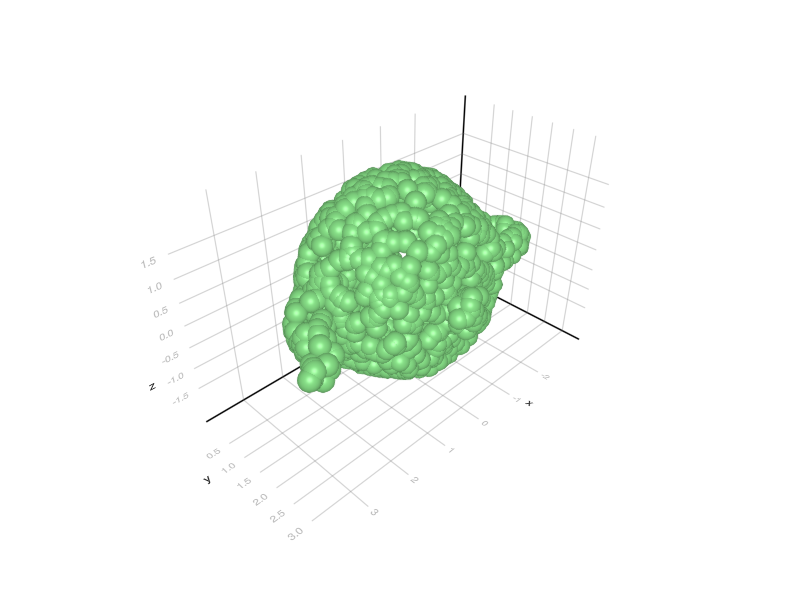

In [4]:
visualize(p)

In [6]:
p.points

3×1000×1 Array{Float32, 3}:
[:, :, 1] =
 0.0459408  -1.9373   -1.06054  -2.02008   …  0.567158  1.35513   -1.6192
 2.33138     1.18726   1.4865    2.21717      2.58769   2.14187    1.81328
 1.52639    -0.23138   1.55608  -0.146053     0.111688  0.886804  -0.679667

In [19]:
selectdim(p.points, 2, [1,3,5,7])

3×4×1 view(::Array{Float32, 3}, :, [1, 3, 5, 7], :) with eltype Float32:
[:, :, 1] =
 -0.469914  -0.647261  -0.3297    -0.684874
 -0.103602  -0.23902   -0.472429  -0.094278
 -0.232627  -0.227867  -0.575315  -0.353281

In [22]:
dim = 2
num_indices = 5
indices = rand(1:size(p.points, dim), num_indices)
selectdim(p.points, dim, indices)

3×5×1 view(::Array{Float32, 3}, :, [364, 733, 915, 549, 20], :) with eltype Float32:
[:, :, 1] =
 -0.167885  -0.176939  -0.573684  -0.564712   -0.314208
 -0.354848  -0.302062  -0.282402  -0.0688519  -0.0816916
 -0.429538  -0.37652   -0.178988  -0.376241   -0.370743